## Variation in spectrum of the Jacobian of consensus dynamics

We consider the system:

$$\dot{\mathbf{x}} = -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u); \quad \mathbf{x} \in \mathbb{R}^N, \mathbf{S}:\mathbb{R}^N \times \mathbb{R} \rightarrow \mathbb{R}^N,$$

where $\mathbf{S}(\mathbf{x}, u) := (S(x_i,u))_{i=1,\dots,N}, S:\mathbb{R}^2 \rightarrow \mathbb{R}$.

To analyse stability of the fixed point at the origin, the Jacobian of the above system is:
$$J := -D + kA,$$
where $k := \partial_xS(0,0)$.

In [1]:
%run ../imports.py

In [2]:
import matplotlib.pyplot as plt

In [3]:
N = 4
g = get_strongly_connected_digraph(N)

In [4]:
node_list = np.arange(0,N)

In [5]:
A = nx.adjacency_matrix(g, nodelist = node_list)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D-A

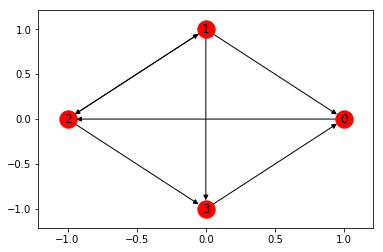

In [6]:
nx.draw_networkx(g, pos = nx.circular_layout(g))

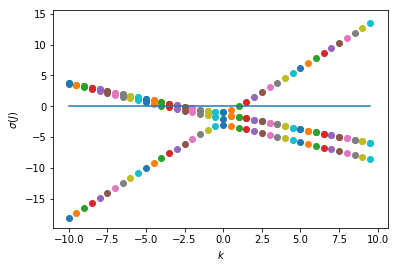

In [32]:
#plt.figure(figsize=(12,8))
energy = np.zeros(40)
i = 0
for k in np.arange(-10,10,0.5):
    val, vec = np.linalg.eig(-D+k*A)
    u,e,v = np.linalg.svd(-D+k*A)
    energy[i] = np.sum(e)
    i = i+1
    plt.scatter(np.repeat(k,N),np.real(val))
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma(J)$')
plt.plot(np.arange(-10,10,0.5),np.repeat(0,40))
#plt.plot(np.arange(-10,10,0.5), energy)

In [8]:
D

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 1]])

In [9]:
print(A.todense())

[[0 0 1 0]
 [1 0 1 1]
 [0 1 0 1]
 [1 0 0 0]]


In [10]:
L

matrix([[ 1,  0, -1,  0],
        [-1,  3, -1, -1],
        [ 0, -1,  2, -1],
        [-1,  0,  0,  1]], dtype=int64)

In [11]:
w,v = np.linalg.eig(L)

In [12]:
w

array([4.4409e-16+0.j    , 3.4656e+00+0.j    , 1.7672e+00+0.7926j,
       1.7672e+00-0.7926j])

In [13]:
[g.has_edge(e,e) for e in g.nodes()]

[False, False, False, False]

In [14]:
k = 1

In [15]:
np.linalg.eigvals((-1+k)*D-k*L)

array([-4.4409e-16+0.j    , -3.4656e+00+0.j    , -1.7672e+00+0.7926j,
       -1.7672e+00-0.7926j])

In [16]:
d = np.linalg.eigvals(D)
l = np.linalg.eigvals(L)
a = np.linalg.eigvals(A.todense())

In [17]:
k = 1.5

In [18]:
np.linalg.eigvals((-1+k)*D-k*L)

array([ 0.7237+0.j    , -1.9787+1.2327j, -1.9787-1.2327j, -3.7663+0.j    ])

In [19]:
np.linalg.eigvals(-D+k*A)

array([ 0.7237+0.j    , -1.9787+1.2327j, -1.9787-1.2327j, -3.7663+0.j    ])

In [20]:
(-1+k)*d-k*l

array([ 0.5   +0.j    , -3.6984+0.j    , -1.6508-1.1888j, -2.1508+1.1888j])

In [21]:
-d+k*a

array([ 1.4271+0.j   , -3.75  +1.299j, -2.75  -1.299j, -1.9271+0.j   ])

In [22]:
d

array([1., 3., 2., 1.])

In [23]:
l

array([4.4409e-16+0.j    , 3.4656e+00+0.j    , 1.7672e+00+0.7926j,
       1.7672e+00-0.7926j])

In [24]:
a

array([ 1.618+0.j   , -0.5  +0.866j, -0.5  -0.866j, -0.618+0.j   ])

In [25]:
D

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 1]])

In [26]:
A.todense()

matrix([[0, 0, 1, 0],
        [1, 0, 1, 1],
        [0, 1, 0, 1],
        [1, 0, 0, 0]], dtype=int64)

In [27]:
[e for e in g.edges()]

[(0, 2), (1, 0), (1, 2), (1, 3), (2, 3), (2, 1), (3, 0)]

In [28]:
np.linalg.svd(D-A)

(matrix([[ 0.0735,  0.4675,  0.5346,  0.7001],
         [ 0.8843, -0.4384,  0.0784,  0.14  ],
         [-0.4599, -0.7615,  0.1791,  0.4201],
         [ 0.032 ,  0.0963, -0.8222,  0.5601]]),
 array([3.7524e+00, 2.2476e+00, 1.6935e+00, 3.0924e-16]),
 matrix([[-0.2246,  0.8296, -0.5004, -0.1046],
         [ 0.3602, -0.2463, -0.6906,  0.5767],
         [ 0.7549,  0.0332, -0.1505, -0.6375],
         [-0.5   , -0.5   , -0.5   , -0.5   ]]))

In [29]:
np.linalg.svd(A.todense())

(matrix([[-2.6849e-01,  2.9917e-01,  7.0711e-01, -5.8173e-01],
         [-8.3633e-01,  2.2315e-01, -2.7756e-17,  5.0076e-01],
         [-3.9544e-01, -8.7818e-01,  1.6653e-16, -2.6911e-01],
         [-2.6849e-01,  2.9917e-01, -7.0711e-01, -5.8173e-01]]),
 array([2.0285, 1.3213, 1.    , 0.3731]),
 matrix([[-5.4464e-01, -1.9494e-01, -5.4464e-01, -6.0723e-01],
         [ 3.9530e-01, -6.6462e-01,  3.9530e-01, -4.9574e-01],
         [-7.0711e-01, -1.1102e-16,  7.0711e-01,  1.1102e-16],
         [-2.1704e-01, -7.2130e-01, -2.1704e-01,  6.2090e-01]]))

In [30]:
e = g.edges()

In [31]:
print(e)

[(0, 2), (1, 0), (1, 2), (1, 3), (2, 3), (2, 1), (3, 0)]
